In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
data = pd.read_excel("CW_Data.xlsx")
display(data)


,Index,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,1,3,3,45.0,21,8,4,2,10.0,0
1,2,2,3,3,43.0,21,4,2,8,8.0,0
2,3,1,4,2,26.0,24,0,0,2,0.0,0
3,4,2,1,3,30.0,24,4,0,0,0.0,2
4,5,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
614,615,2,1,2,55.0,33,6,4,4,8.0,0
615,616,2,4,2,41.0,27,6,4,4,0.0,0
616,617,2,1,2,73.0,36,8,8,11,10.0,0
617,618,2,1,2,77.0,42,8,8,6,10.0,3


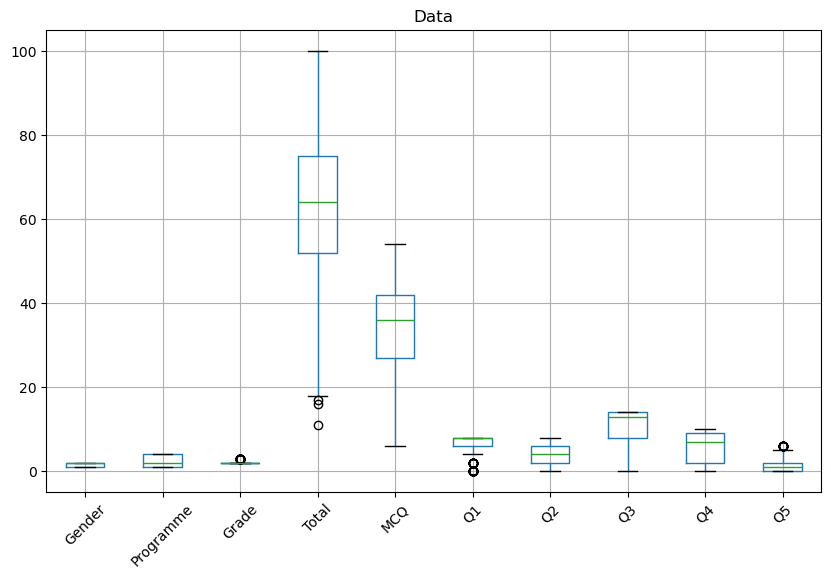

In [2]:
data1 = data.drop(columns=['Index'])
#先把Index去掉
#画个箱型图先
plt.figure(figsize=(10, 6))
data1.boxplot()
plt.title('Data')
plt.xticks(rotation=45)
plt.show()


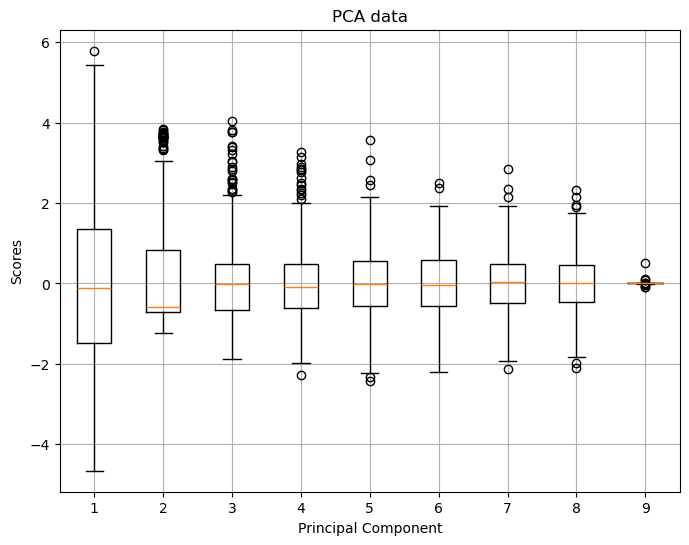

In [3]:
# 去掉Programme后先标准化再直接PCA
data0 = data1.drop(columns=['Programme'])

#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data0)

pca = PCA()
score = pca.fit_transform(scaled_data)

#再画个PCA后的图
plt.figure(figsize=(8, 6))
plt.boxplot(score)
plt.title('PCA data')
plt.xlabel('Principal Component')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [4]:
pca.explained_variance_ratio_
#看看主成分的占比，看得出标准化后占比少很多

array([4.14792941e-01, 1.28567737e-01, 1.07715683e-01, 8.49056396e-02,
       7.60743720e-02, 7.04895837e-02, 6.27480579e-02, 5.46526108e-02,
       5.33744678e-05])

Text(0, 0.5, 'Explained Variance')

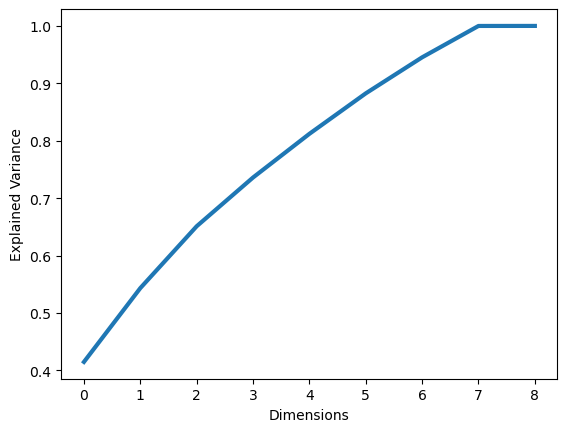

In [5]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
# 标准化后主成分数量的变化的影响

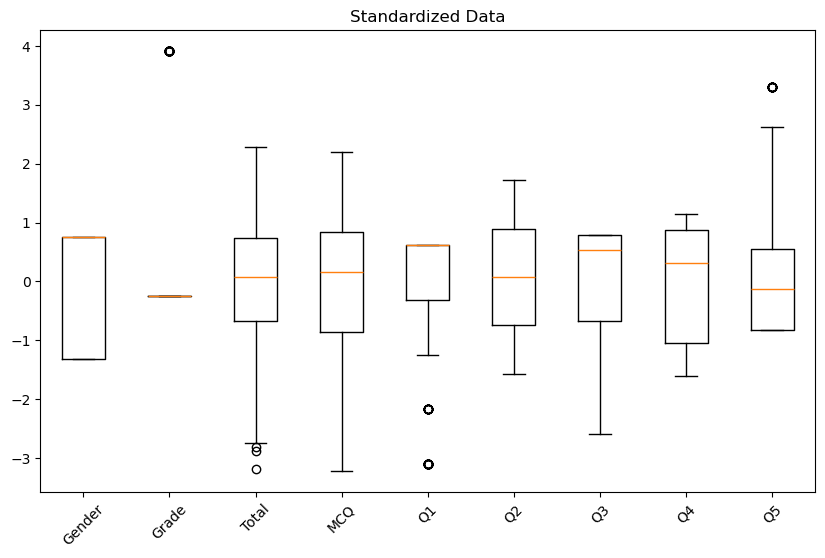

In [6]:
#再画个标准化后的图
plt.figure(figsize=(10, 6))
plt.boxplot(scaled_data, labels=data0.columns)
plt.title('Standardized Data')
plt.xticks(rotation=45)
plt.show()

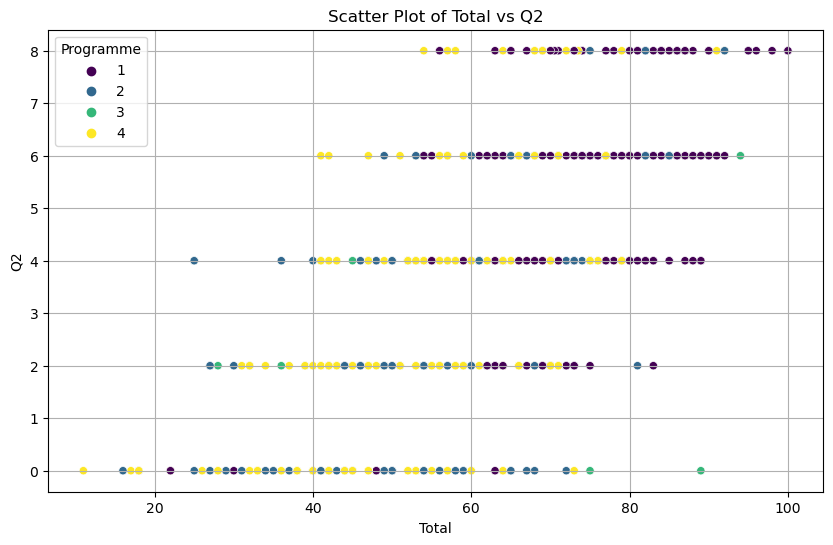

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择要比较的特征
x_feature = 'Total'
y_feature = 'Q2'

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data0, x=x_feature, y=y_feature, hue=data1['Programme'], palette='viridis')
plt.title('Scatter Plot of {} vs {}'.format(x_feature, y_feature))
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.legend(title='Programme')
plt.show()

#这个图用于分别俩个特征在Programme类的分布情况（感觉没用）

In [8]:
# 获取主成分的加载向量
loadings = pca.components_
 
# 创建 DataFrame 显示加载向量
loadings_df = pd.DataFrame(loadings, columns=data0.columns)

# 显示加载向量表格
print("Original Features in Principal Components:")
print(loadings_df)

#其实可以看出来Q3和Q5没啥用（可能）

Original Features in Principal Components:
     Gender     Grade     Total       MCQ        Q1        Q2        Q3  \
0 -0.050072 -0.005679 -0.508376 -0.402361 -0.293661 -0.366288 -0.331810   
1 -0.718363  0.665565  0.034767  0.029683 -0.096198 -0.033388  0.166910   
2  0.498781  0.612728 -0.054860 -0.022081 -0.234440 -0.025830 -0.354505   
3 -0.033854 -0.202498  0.041051  0.146871 -0.857620  0.321395  0.203168   
4 -0.329915 -0.307079 -0.140913 -0.480353 -0.048413 -0.136341 -0.024984   
5 -0.340002 -0.174413  0.037016  0.395933  0.094581  0.159279 -0.746408   
6  0.041179 -0.070385  0.107193  0.365982 -0.040705 -0.778954  0.215187   
7  0.073326  0.104299 -0.129895 -0.300713  0.298450  0.308377  0.217813   
8 -0.000629  0.000215  0.828288 -0.450880 -0.109616 -0.122198 -0.208794   

         Q4        Q5  
0 -0.370149 -0.331071  
1 -0.014114 -0.021465  
2  0.208107  0.384281  
3 -0.170636  0.159344  
4  0.461031  0.558710  
5 -0.213245  0.242760  
6 -0.257753  0.356019  
7 -0.656734  0

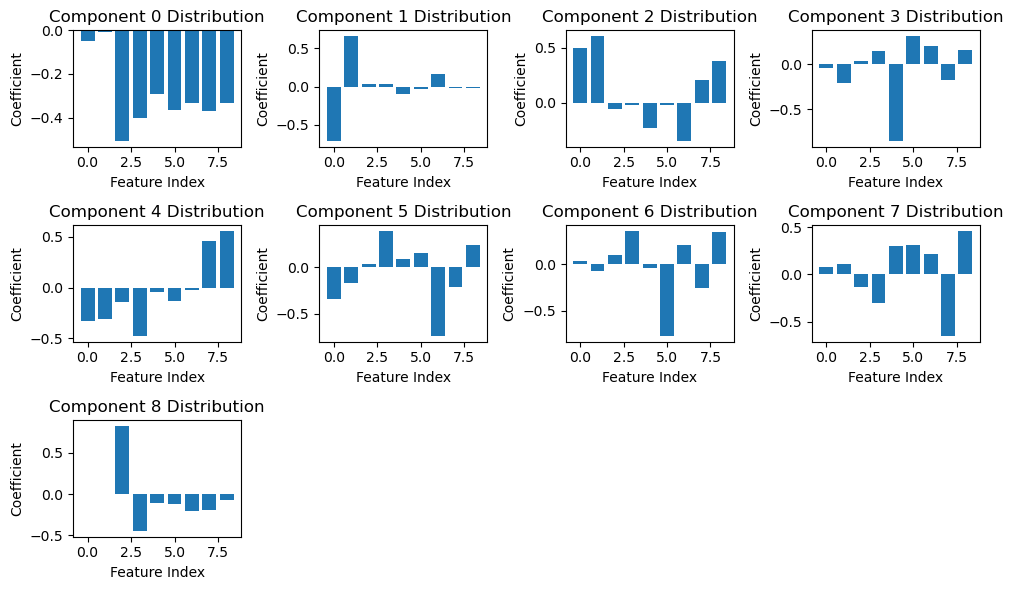

In [9]:
# 获取每个主成分的系数
components = pca.components_

# 绘制每个主成分的分布图
plt.figure(figsize=(10, 6))
for i in range(components.shape[0]):
    plt.subplot(3, 4, i+1)
    plt.bar(range(len(components[i])), components[i])
    plt.title(f'Component {i} Distribution')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()
#特征对主成分的贡献
#和上面的加载向量作用一样


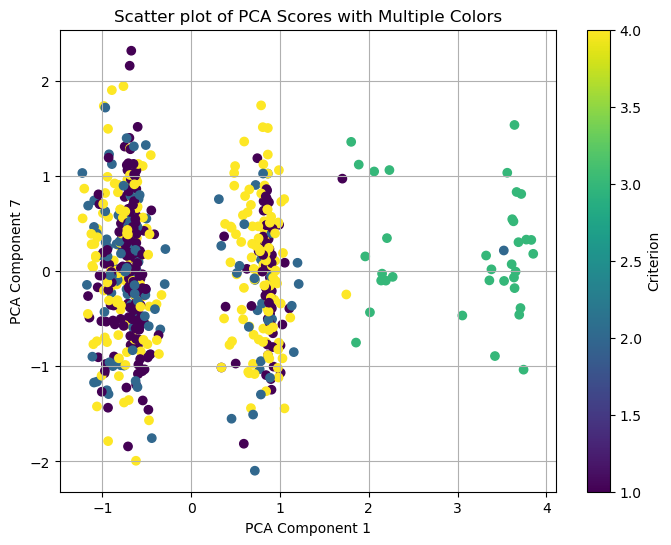

In [10]:
#找最好的特征组合
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 1], score[:, 7],c=data1['Programme'],cmap='viridis')
plt.title('Scatter plot of PCA Scores with Multiple Colors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 7')
plt.colorbar(label='Criterion')
plt.grid(True)
plt.show()

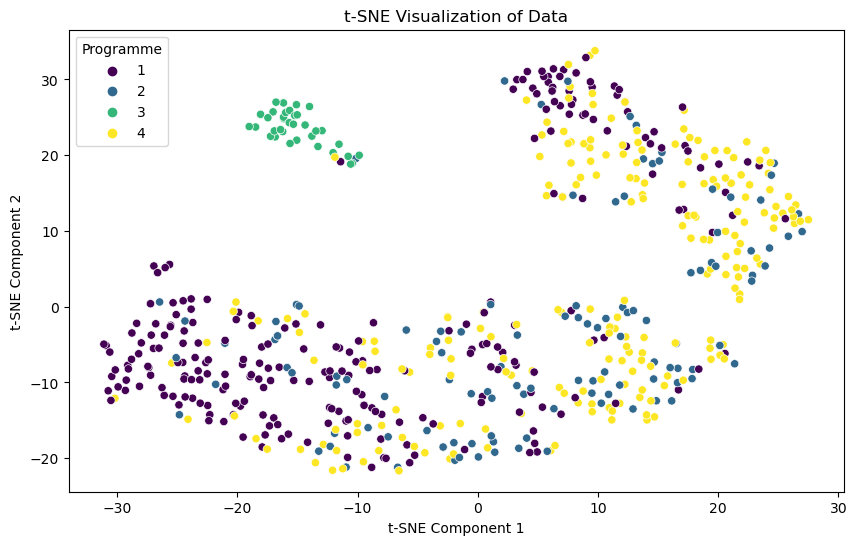

In [11]:
# 筛选数据
import seaborn as sns
from sklearn.manifold import TSNE

# 对数据进行预处理，例如处理缺失值或标准化
from sklearn.preprocessing import StandardScaler

# 创建一个标准化器
scaler = StandardScaler()

# 标准化处理
data_scaled = scaler.fit_transform(data0)

# 将标准化后的数据转换为 DataFrame
data_scaled_df = pd.DataFrame(data_scaled)

# 应用 t-SNE 算法进行降维
tsne = TSNE()
tsne_data = tsne.fit_transform(data_scaled_df)

# 将 t-SNE 降维后的数据点绘制成散点图，根据 Programme 类别进行着色
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=data['Programme'], palette='viridis')
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Programme')
plt.show()

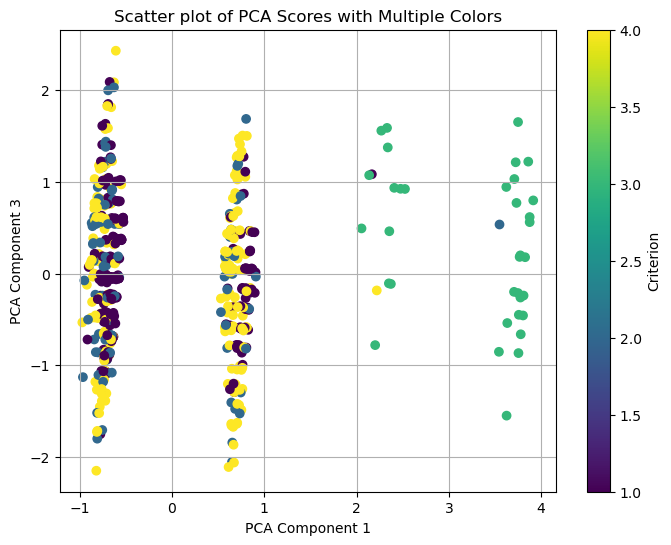

In [17]:
#手动降维
data2 = data0.drop(columns=['Q1'])
data3 = data2.drop(columns=['Q3'])
data4 = data3.drop(columns=['Q5'])

#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data4)

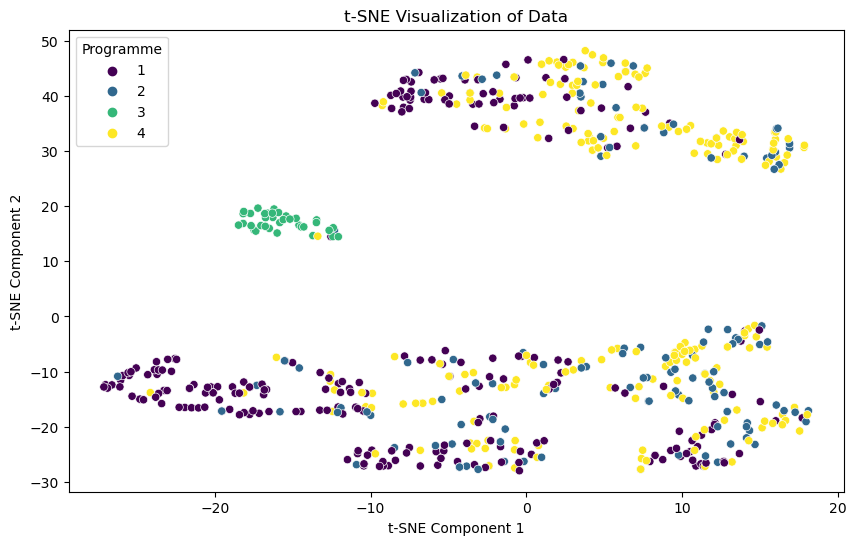

In [24]:
#tsne
tsne = TSNE(n_components = 2)
tsne_data = tsne.fit_transform(scaled_data)

# 将 t-SNE 降维后的数据点绘制成散点图，根据 Programme 类别进行着色
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=data1['Programme'], palette='viridis')
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Programme')
plt.show()


#为什么效果不一样？？？？？

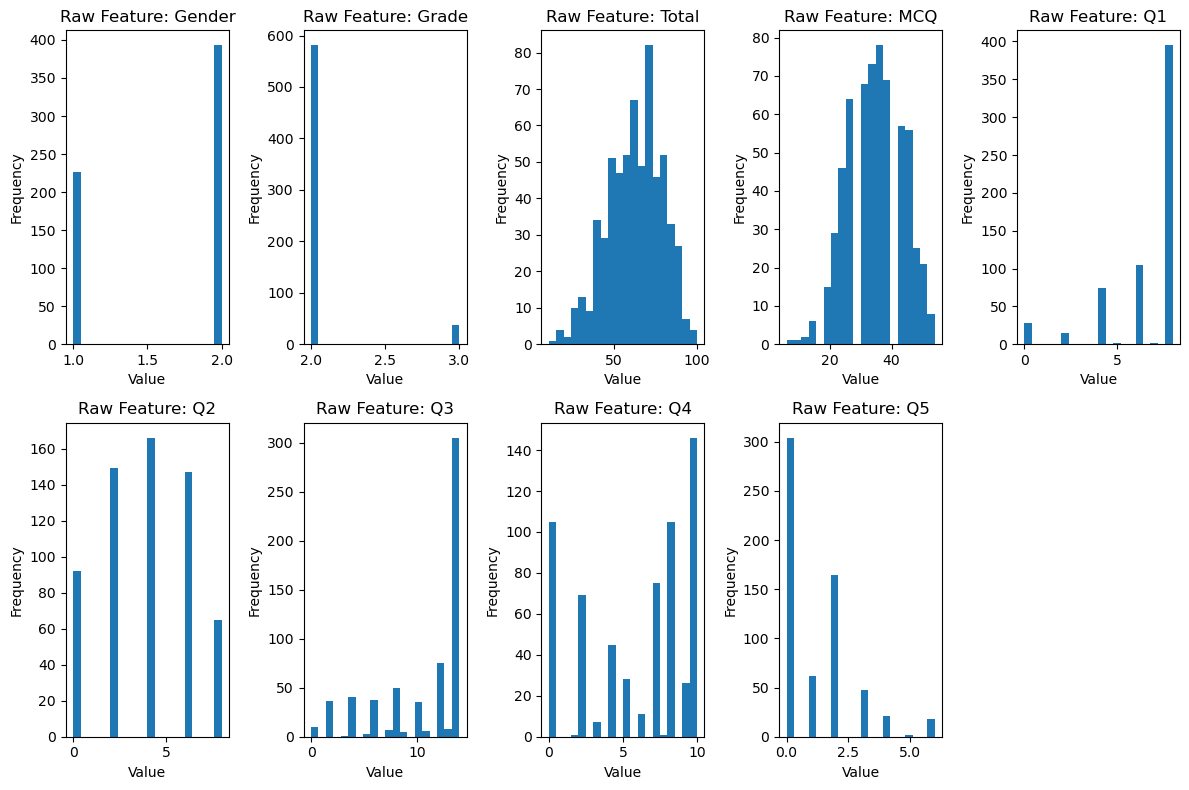

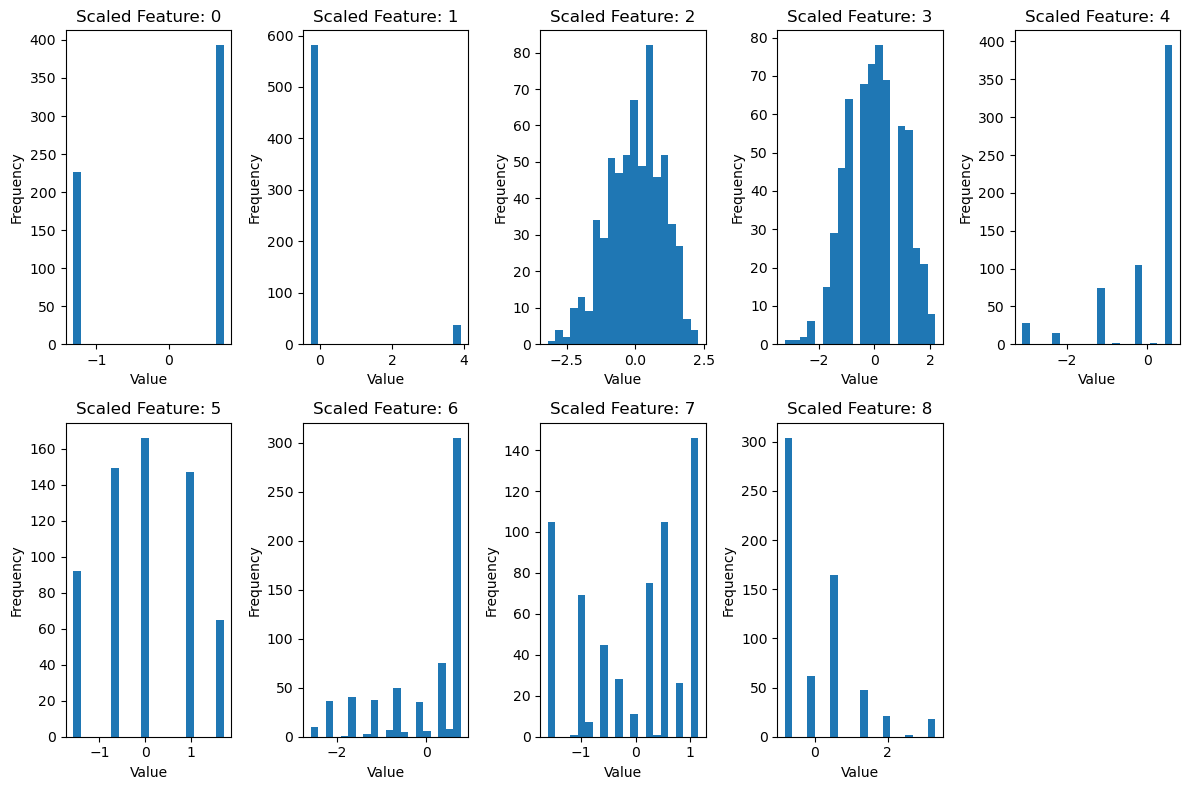

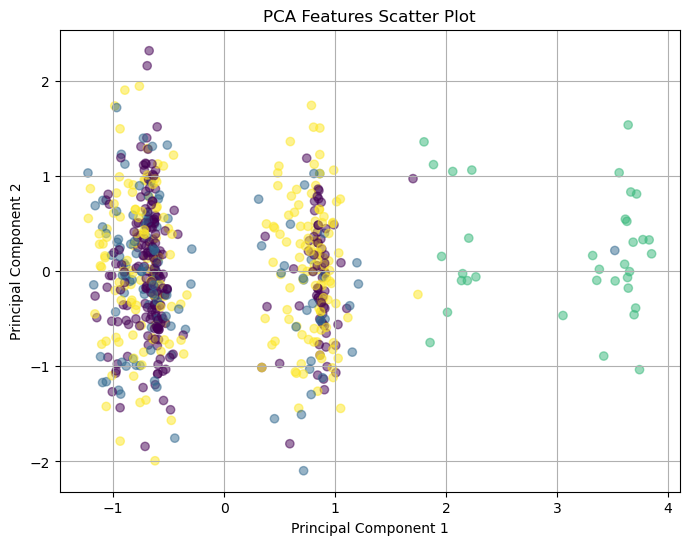

In [51]:
# 可视化原始特征
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data0.columns):
    plt.subplot(2, 5, i+1)
    plt.hist(data[feature], bins=20)
    plt.title(f'Raw Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化标准化特征
plt.figure(figsize=(12, 8))
scaled_data_df = pd.DataFrame(scaled_data)
for i, feature in enumerate(scaled_data_df.columns):
    plt.subplot(2, 5, i+1)
    plt.hist(scaled_data[:, i], bins=20)
    plt.title(f'Scaled Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化PCA特征
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 1], score[:, 7], c=data1['Programme'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Features Scatter Plot')
plt.grid(True)
plt.show()